In [92]:
import numpy as np
import random
import math
from scipy.stats import nbinom
import matplotlib.pyplot as plt

### Introdução

Considere uma urna com t bolas, sendo g verdes e r vermelhas, com g + r = t. Quando uma
bola é retirada com reposição, significa que esta bola volta para a urna antes da próxima ser
retirada. Quando uma bola é retirada sem reposição, significa que esta bola não volta para
a urna antes da próxima ser retirada.  
Sejam os seguintes experimentos probabilísticos, em que n e k são parâmetros dos experimentos.

* Experimento 1a. Retira-se, uma por uma, um total de n bolas da urna, com reposição.
* Experimento 1b. Retira-se, uma por uma, um total de n bolas da urna, sem reposição.
* Experimento 2a. Retira-se, uma por uma, bolas da urna, com reposição. O experimento
se encerra imediatamente após a k-ésima bola verde é retirada.
* Experimento 2b. Retira-se, uma por uma, bolas da urna, sem reposição. O experimento se encerra imediatamente após a k-ésima bola verde é retirada

Defina as seguintes variáveis aleatórias:  
* Experimentos 1a e 1b. K = número de bolas verdes retiradas no experimento.
* Experimentos 2a e 2b. N = número total de bolas retiradas no experimento.  
Tais variáveis aleatórias estão relacionadas com as seguintes distribuições discretas:
* Experimentos 1a. Distribuição binomial.
* Experimentos 1b. Distribuição hipergeométrica.
* Experimentos 2a. Distribuição binomial negativa (ou de Pascal).
* Experimentos 2b. Distribuição hipergeométrica negativa.

1 - Escreva uma função que implementa uma única realização da variável aleatória K do Experimento 1a, para (t, g, n) genéricos. Em seguida, utilize as funções escritas com (t, g, n) = (8, 4, 6) e com (t, g, n) = (100, 20, 95).  
* Plote figuras contendo a função massa de probabilidade teórica, bem como aquela obtida via simulação de Monte Carlo.
* Calcule os valores teóricos da média e da variância, bem como aqueles obtidos via simulação.

Dados:

n = numero de bolas retiradas da urna  
t = número de bolas  
g = bolas verdes  
r = bolas vermelhas  
t = g+r  
k = possivel resultado da variavel aleatoria  
K = número de bolas verdes retiradas no experimento.

$$p=\frac{g}{t} \quad q=\frac{r}{t} \qquad \binom{n}{k} = \frac{n!}{k!(n-k)!}$$  

PMF 1a -  $$p_K(k)=\binom{n}{k}p^kq^{n-k}$$

PMF 1b -  $$p_K(k)=\frac{\binom{g}{k}}{\binom{t}{n}}\binom{r}{l}$$


## Formulas

In [136]:
def coef_binon(n,k):
  
    if k > n:
        return 0
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

def prob(g,t): 
    return float(g)/t

def prob_pra(vet): 
    count = 0
    for i in vet:
        if vet[i] > 0:
            count += 1
    return count/len(vet)        
        
        


def pmf_1a(p,n,k):
    pmf = coef_binon(n,k)*(p**k)*(1-p)**(n-k)
    return pmf

def pmf_1b(g,r,t,n,k):
    l = n-k
  
    pmf = (coef_binon(g,k)/coef_binon(t,n))*coef_binon(r,l)
    return pmf

def media_1(n,p):
    return n*p

def var_1a(n,p,q):
    return n*p*q

def var_1b(n,p,q,t):
    return (n*p*q)*(t-n/t-1)

def exp_1a(t,g,n):
     p = prob(g,t)
     
     i = 0
     outcomes = []
     while i < n:
            a = random.uniform(0, 1)
            outcomes.append(a <= p)
            i += 1       
     return np.sum(outcomes)

def exp_1b(t,g,n):
     i = 0
     outcomes = []
     while i < n:
            a = random.uniform(0, 1)
            p = prob(g,t)
            outcomes.append(a <= p)
            t -= 1
            i += 1       
     return np.sum(outcomes)
            
     
        
    


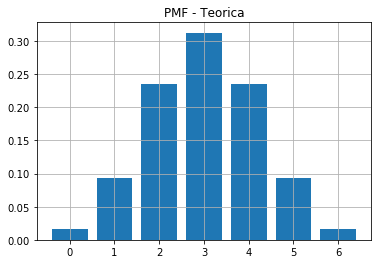

---Valores teoricos---
Media: 3.0 Variancia: 1.5


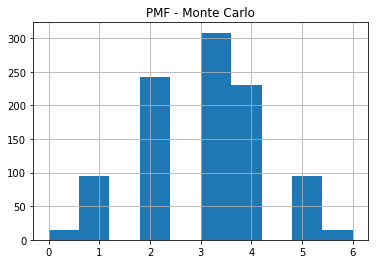

---Valores Monte Carlo---
Media: 2.988 Variancia: 1.501856


In [132]:
#Teorico
t, g, n = 8, 4, 6
pmf_vet_t = []
p = prob(g,t)

for i in range(n+1):
    pmf_vet_t.append(pmf_1a(p,n,i))
    
plt.bar(range(n+1),pmf_vet_t)
plt.grid()
plt.title('PMF - Teorica')
plt.show()
media_t = media_1(n,p)
var_t = var_1a(n,p,1-p)
print("---Valores teoricos---")
print("Media: {} Variancia: {}".format(media_t,var_t))

#Monte Carlo
mc=1000
pmf_vet_p = []
for i in range(mc):
    pmf_vet_p.append(exp_1a(t, g, n))

plt.hist(pmf_vet_p)
plt.title('PMF - Monte Carlo')
plt.grid()
plt.show()


print("---Valores Monte Carlo---")
print("Media: {} Variancia: {}".format(np.mean(pmf_vet_p),np.var(pmf_vet_p)))

### Para  (t, g, n) = (100, 20, 95)

Qutd. de bolas verdes retiradas: 16


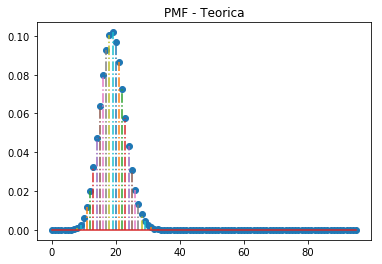

---Valores teoricos---
Media: 19.0 Variancia: 15.200000000000001


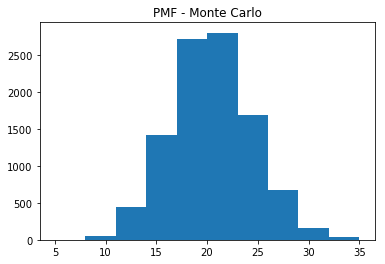

---Valores Monte Carlo---
Media: 19.9521 Variancia: 15.941005589999998


In [134]:
#(t, g, n) 
t, g, n = 100, 20, 95
X_b = exp_1a(t, g, n)
print("Qutd. de bolas verdes retiradas: {}".format(X_b))
pmf_vet = []
p = prob(g,t)
q = 1-p
for i in range(n+1):
    pmf_vet.append(pmf_1a(p,n,i))
 
plt.stem(range(n+1),pmf_vet,'-.')
plt.title('PMF - Teorica')
plt.show()
media_t = media_1(n,p)
var_t = var_1a(n,p,q)
print("---Valores teoricos---")
print("Media: {} Variancia: {}".format(media_t,var_t))

#Monte Carlo
n=1000
pmf_vet_p = []
for i in range(10000):
    pmf_vet_p.append(exp_1a(t, g, t))
 
plt.hist(pmf_vet_p)
plt.title('PMF - Monte Carlo')
plt.show()
print("---Valores Monte Carlo---")
print("Media: {} Variancia: {}".format(np.mean(pmf_vet_p),np.var(pmf_vet_p)))

## 2 Repita o exercício anterior, agora considerando o Experimento 1b.  



### Para (t, g, n) = (8, 4, 6) 

Qutd. de bolas verdes retiradas: 5


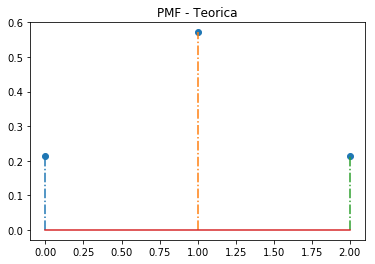

---Valores teoricos---
Media: 3.0 Variancia: 9.375


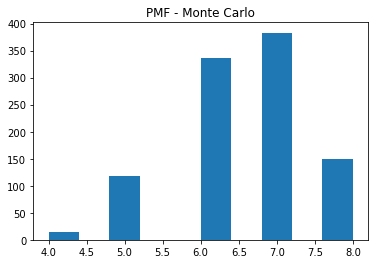

---Valores Monte Carlo---
Media: 500.0 Variancia: -29500.0


In [137]:
#pmf_1b(g,r,t,n,k)
g, r, t, n = 4, 4, 8, 6
X_a = exp_1b(t, g, n)
print("Qutd. de bolas verdes retiradas: {}".format(X_a))
pmf_vet = []
p = prob(g,t)
q = 1-p
for i in range(n+1):
    va = pmf_1b(g,r,t,n,i)
    if va > 0:
        pmf_vet.append(va)
    ##print("pmf: {}".format(pmf_vet[i]))
 
plt.stem(range(len(pmf_vet)),pmf_vet,'-.')
plt.title('PMF - Teorica')
plt.show()
media_t = media_1(n,p)
var_t = var_1b(n,p,q,t)
print("---Valores teoricos---")
print("Media: {} Variancia: {}".format(media_t,var_t))

#Monte Carlo
n=1000
pmf_vet = []
for i in range(1000):
     pmf_vet.append(exp_1b(t, g, t))
     
    
plt.hist(pmf_vet,histtype='bar')
plt.title('PMF - Monte Carlo')
plt.show()
media_t = media_1(n,p)
var_t = var_1b(n,p,q,t)
print("---Valores Monte Carlo---")
print("Media: {} Variancia: {}".format(media_t,var_t))

## Para  (t, g, n) = (100, 20, 95)

Qutd. de bolas verdes retiradas: 48


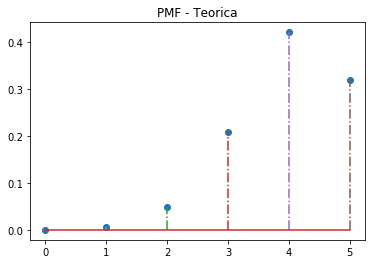

---Valores teoricos---
Media: 19.0 Variancia: 1490.3600000000001


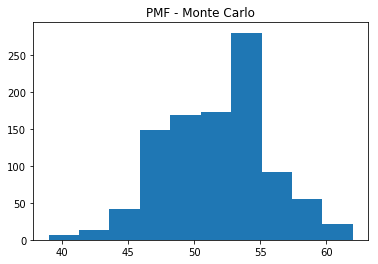

---Valores Monte Carlo---
Media: 200.0 Variancia: 14240.0


In [4]:
#pmf_1b(g,r,t,n,k)
g, r, t, n = 20, 80, 100, 95
X_a = exp_1b(t, g, n)
print("Qutd. de bolas verdes retiradas: {}".format(X_a))
pmf_vet = []
p = prob(g,t)
q = 1-p
i=0
for i in range(n+1):
    va = pmf_1b(g,r,t,n,i)
    if va > 0:
        pmf_vet.append(va)
    ##print("pmf: {}".format(pmf_vet[i]))
 
plt.stem(range(len(pmf_vet)),pmf_vet,'-.')
plt.title('PMF - Teorica')
plt.show()
media_t = media_1(n,p)
var_t = var_1b(n,p,q,t)
print("---Valores teoricos---")
print("Media: {} Variancia: {}".format(media_t,var_t))

#Monte Carlo
n=1000
pmf_vet = []
for i in range(n+1):
     pmf_vet.append(exp_1b(t, g, t))
     
    
plt.hist(pmf_vet,histtype='bar')
plt.title('PMF - Monte Carlo')
plt.show()
media_t = media_1(n,p)
var_t = var_1b(n,p,q,t)
print("---Valores Monte Carlo---")
print("Media: {} Variancia: {}".format(media_t,var_t))

## Experimento 2 a/b

* Experimento 2a. Retira-se, uma por uma, bolas da urna, com reposição. O experimento
se encerra imediatamente após a k-ésima bola verde é retirada.
* Experimento 2b. Retira-se, uma por uma, bolas da urna, sem reposição. O experimento se encerra imediatamente após a k-ésima bola verde é retirada  

VA's: 
* Experimentos 2a e 2b. N = número total de bolas retiradas no experimento.  

PMF's:
* Experimentos 2a. Distribuição binomial negativa (ou de Pascal).
* Experimentos 2b. Distribuição hipergeométrica negativa.

**Formulas:**

$$p=\frac{g}{t} \quad q=\frac{r}{t} \qquad \binom{n}{k} = \frac{n!}{k!(n-k)!}$$  

PMF 2a -  $$p_K(k)=\binom{n-1}{k-1}p^kq^{n-k}$$

PMF 2b -  $$p_K(k)=\frac{\binom{g}{k-1}}{\binom{t}{n-1}}\frac{g-k+1}{t-n+1}\binom{r}{l}$$

Media 2a - $$E[N]=\frac{k}{p}$$

Media 2b - $$E[N]=k\frac{t+1}{g+1}$$

Variância 2a - $$var[N]=k\frac{q}{p^2}$$ 

Variância 2b - $$var[N]=k\frac{(t-g)(t+1)(g+1-k)}{(g+1)^2(g+2)}$$ 


In [118]:
def pmf_2a(n,k,p):
    q = 1-p
    return coef_binon(n-1,k-1)*(p**k)*(1-p)**(n-k)

def pmf_2b(t,g,n,k):
    return (coef_binon(g,k-1)/coef_binon(t,n-1))*((g-k+1)/(t-n+1))*coef_binon(t-n,n-k)

def media_2a(p,k):
    return k/p

def media_2b(t,g,k):
    return k*(t+1/g+1)

def var_2a(p,k):
    q = 1-p
    return k*(q/p**2)

def var_2b(t,g,k):
    return k*(((t-g)*(t+1)*(g+1-k))/(((g+1)**2)*(g+2)))

def exp_2a(t,g,k):
     p = prob(g,t)
     i = 1
     while i <= k:
            a = random.uniform(0, 1)
            #print("a: {}, p: {}".format(a,p))
            #print(a <= p)
            if a <= p:
                return i
            i += 1       
     return 0

def exp_2b(t,g,k):
     p = prob(g,t)
     i = 1
     while i <= k:
            a = random.uniform(0, 1)
            #print("a: {}, p: {}".format(a,p))
            #print(a <= p)
            if a <= p:
                return i
            i += 1
            g -= 1
            p = g/t
     return 0
            

    
    
    


3 - Escreva uma função que implementa uma única realização da variável aleatória N do
Experimento 2a, para (t, g, k) genéricos. Em seguida, utilize as funções escritas com
(t, g, k) = (8, 6, 4) e com (t, g, k) = (100, 20, 20).

* Plote figuras contendo a função massa de probabilidade teórica, bem como aquela
obtida via simulação de Monte Carlo.
* Calcule os valores teóricos da média e da variância, bem como aqueles obtidos via
simulação.


### Para (t, g, k) = (8, 6, 4) 

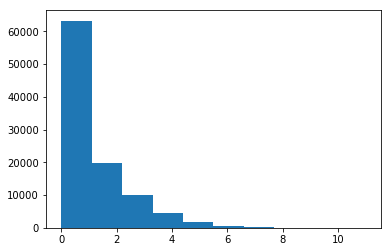

---Valores Praticos ---
Media: 1.33729 Variancia: 1.7736054558999998


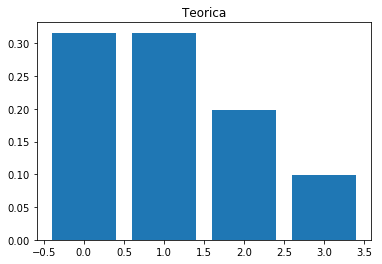

---Valores Teoricos ---
Media: 5.33 Variancia: 1.78


In [128]:
t, g, k = 8, 6, 4 
p = prob(g,t)

#Monte Carlo
r = nbinom.rvs(k, p, size=100000)
plt.hist(r)
plt.show()
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(r),np.var(r)))

#Teorica
y=nbinom.pmf(range(k),k,p)
plt.bar(range(k),y) 
plt.title('Teorica')
plt.show()
media_t = round(media_2a(p,k),2)
vari = round(var_2a(p,k),2)
print("---Valores Teoricos ---")
print("Media: {} Variancia: {}".format(media_t,vari))



### Para (t, g, k) = (100, 20, 20) 

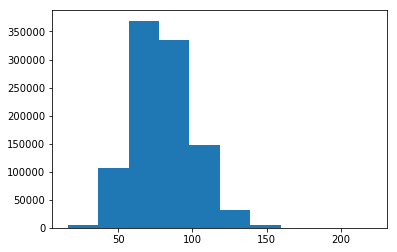

---Valores Praticos ---
Media: 80.005812 Variancia: 400.34121622065607


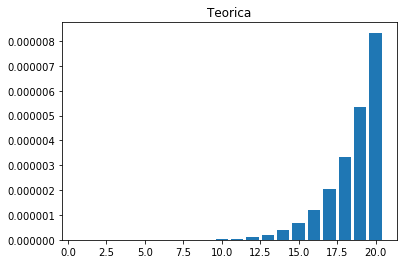

---Valores Teoricos ---
Media: 100.0 Variancia: 400.0
2.16918931158e-05


In [127]:
t, g, k = 100, 20, 20
p = prob(g,t)

#Monte Carlo
r = nbinom.rvs(k, p, size=1000000)
plt.hist(r)
plt.show()
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(r),np.var(r)))

#Teorica
y=nbinom.pmf(range(1,k+1),k,p)
plt.bar(range(1,k+1),y) 
plt.title('Teorica')
plt.show()

media_t = round(media_2a(p,k),2)
vari = round(var_2a(p,k),2)
print("---Valores Teoricos ---")
print("Media: {} Variancia: {}".format(media_t,vari))
print(np.sum(y))

### Experimento 2b

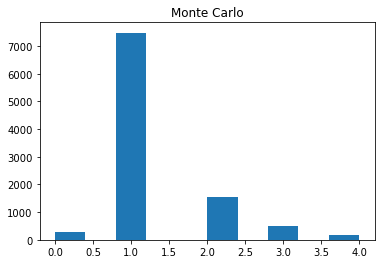

---Valores Praticos ---
Media: 1.2815 Variancia: 0.46965774999999993


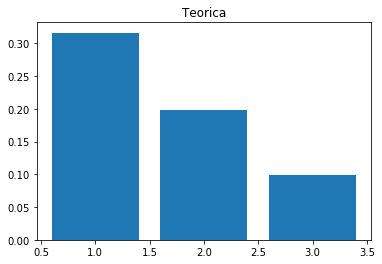

---Valores Teoricos ---
Media: 36.67 Variancia: 0.55


In [120]:
t, g, k = 8, 6, 4 
p = g/t
#Monte Carlo
pmf_vet_p = []
for i in range(10000):
    pmf_vet_p.append(exp_2b(t,g,k))
    
plt.hist(pmf_vet_p) 
plt.title('Monte Carlo')
plt.show()
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(pmf_vet_p),np.var(pmf_vet_p)))
#Teorica
#outcomes_t = []
#for i in range(1,k+1):
#    outcomes_t.append(pmf_2a(t,i,p))
    
#plt.bar(range(1,k+1),outcomes_t) 
#plt.title('Teorica')
#plt.show()
y=nbinom.pmf(range(1,k),k,p)
plt.bar(range(1,k),y) 
plt.title('Teorica')
plt.show()
media_t = round(media_2b(t,g,k),2)
vari = round(var_2b(t,g,k),2)
print("---Valores Teoricos ---")
print("Media: {} Variancia: {}".format(media_t,vari))

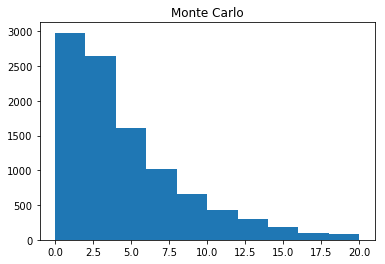

---Valores Praticos ---
Media: 4.1492 Variancia: 15.255939360000001


ZeroDivisionError: float division by zero

In [130]:
t, g, k = 100, 20, 20 
p = g/t
#Monte Carlo
pmf_vet_p = []
for i in range(10000):
    pmf_vet_p.append(exp_2b(t,g,k))
    
plt.hist(pmf_vet_p) 
plt.title('Monte Carlo')
plt.show()
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(pmf_vet_p),np.var(pmf_vet_p)))
#Teorica
outcomes_t = []
for i in range(1,k+1):
    outcomes_t.append(pmf_2b(t,g,n,k))
    
plt.bar(range(1,k+1),outcomes_t) 
plt.title('Teorica')
plt.show()
